## Placement_Classification

About Dataset

This dataset contains information about the students like their academic and training and placement status.

CGPA - It is the overall grades achieved by the student.
Internships - It tells the number of internships a student has done.
Projects - Number of projects a student has done.
Workshops/Certifications - As there are multiple courses available online student opt for them to upskill themselves.
ApptitudeTestScore - Aptitude test are generally a part of the recruitment process to understand the Quant and logical thinking of the student.
SoftSkillrating - Communication is a key role that plays in the placement or in any aspect of the life.
ExtraCurricularActivities - This helps provide and insight about the personality of an individual regarding how much he is active other than the academic.
PlacementTraining - It is provided to students in college to ace the placement process.
SSC and HSC - Senior Secondary and Higher Secondary Marks.
PlacementStatus - This is our target column with two classes placed and not placed.

Importing all the necessary libraries


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import pickle

Data Loading

In [47]:
#loading the dataset
df = pd.read_csv('placementdata.csv')

In [48]:
# Display first few rows
df.head()

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82          Placed  
2                No         79         80       NotPlaced  
3               Yes         81         80          Placed  
4               Yes         74         88          Placed

In [49]:
# Check for missing values
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [50]:
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [51]:
df.describe()

StudentID          CGPA   Internships      Projects  \
count  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000      7.698010      1.049200      2.026600   
std     2886.89568      0.640131      0.665901      0.867968   
min        1.00000      6.500000      0.000000      0.000000   
25%     2500.75000      7.400000      1.000000      1.000000   
50%     5000.50000      7.700000      1.000000      2.000000   
75%     7500.25000      8.200000      1.000000      3.000000   
max    10000.00000      9.100000      2.000000      3.000000   

       Workshops/Certifications  AptitudeTestScore  SoftSkillsRating  \
count              10000.000000       10000.000000      10000.000000   
mean                   1.013200          79.449900          4.323960   
std                    0.904272           8.159997          0.411622   
min                    0.000000          60.000000          3.000000   
25%                    0.000000          73.000000          4.000000   
50%                    1.000000          80.000000          4.400000   
75%                    2.000000          87.000000          4.700000   
max                    3.000000          90.000000          4.800000   

          SSC_Marks     HSC_Marks  
count  10000.000000  10000.000000  
mean      69.159400     74.501500  
std       10.430459      8.919527  
min       55.000000     57.000000  
25%       59.000000     67.000000  
50%       70.000000     73.000000  
75%       78.000000     83.000000  
max       90.000000     88.000000

In [52]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [53]:
df.ExtracurricularActivities.unique()


array(['No', 'Yes'], dtype=object)

In [54]:
df.PlacementStatus.unique()


array(['NotPlaced', 'Placed'], dtype=object)

In [55]:
df.PlacementTraining.unique()

array(['No', 'Yes'], dtype=object)

In [56]:
# Check class distribution
df["PlacementStatus"].value_counts()

PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64

Data Preprocessing

In [57]:
#encode the categorical variables
categorical_columns = ['PlacementTraining', 'ExtracurricularActivities', 'PlacementStatus']
label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

In [58]:
df.head()

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                 65               4.4                          0   
1                 90               4.0                          1   
2                 82               4.8                          1   
3                 85               4.4                          1   
4                 86               4.5                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0         61         79                0  
1                  1         78         82                1  
2                  0         79         80                0  
3                  1         81         80                1  
4                  1         74         88                1

Data Visualization

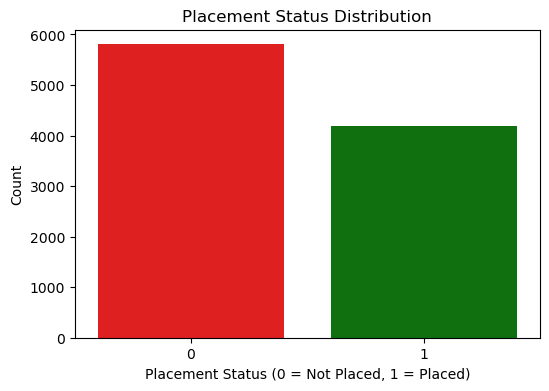

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["PlacementStatus"], palette=["red", "green"])
plt.title("Placement Status Distribution")
plt.xlabel("Placement Status (0 = Not Placed, 1 = Placed)")
plt.ylabel("Count")
plt.show()


Significantly higher number of students are not placed compared to those who are placed, indicating a potential issue in the placement process or preparation.

Suggests a need for targeted interventions to improve the placement rate among students.

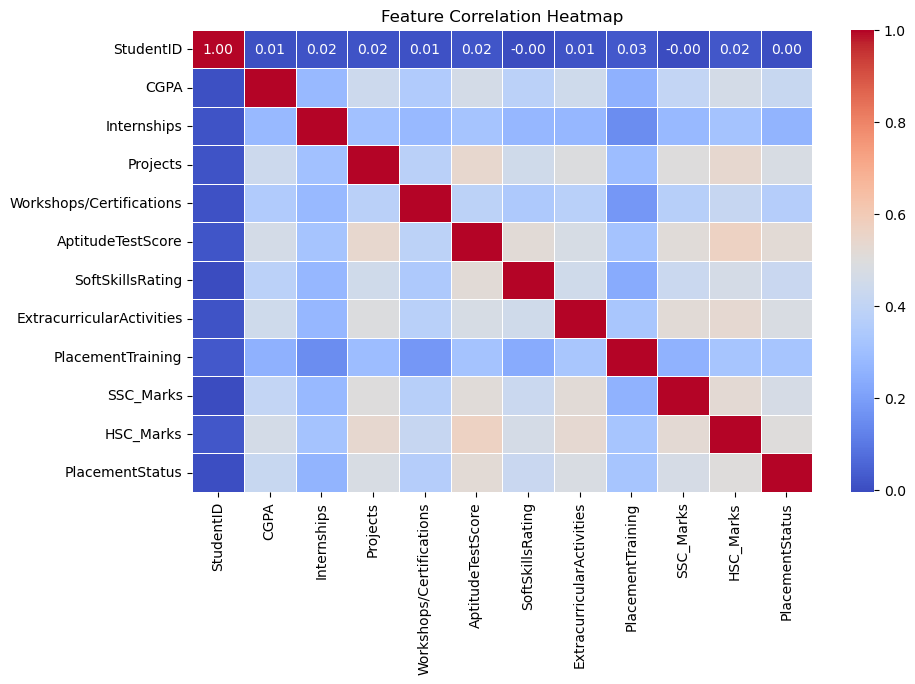

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Strong positive correlation between PlacementStatus and CGPA, AptitudeTestScore, and HSC_Marks, highlighting their importance in determining placement.

Noticeable correlation between Internships, Projects, and PlacementStatus, emphasizing the role of practical experience.

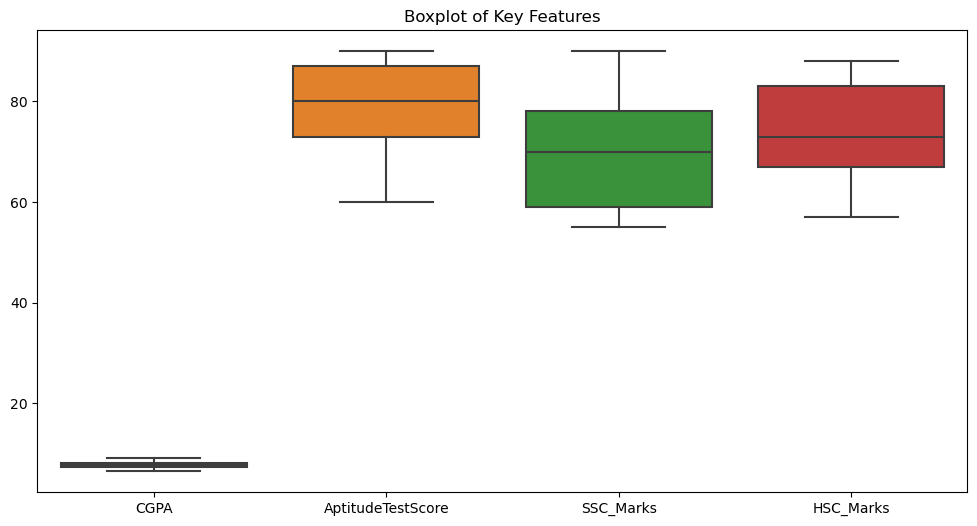

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["CGPA", "AptitudeTestScore", "SSC_Marks", "HSC_Marks"]])
plt.title("Boxplot of Key Features")
plt.show()


In [ ]:
Placed students generally have higher GPAs compared to those not placed, reinforcing the importance of academic performance.

Similar trend observed for AptitudeTestScore and HSC_Marks, indicating their critical role in placement success.

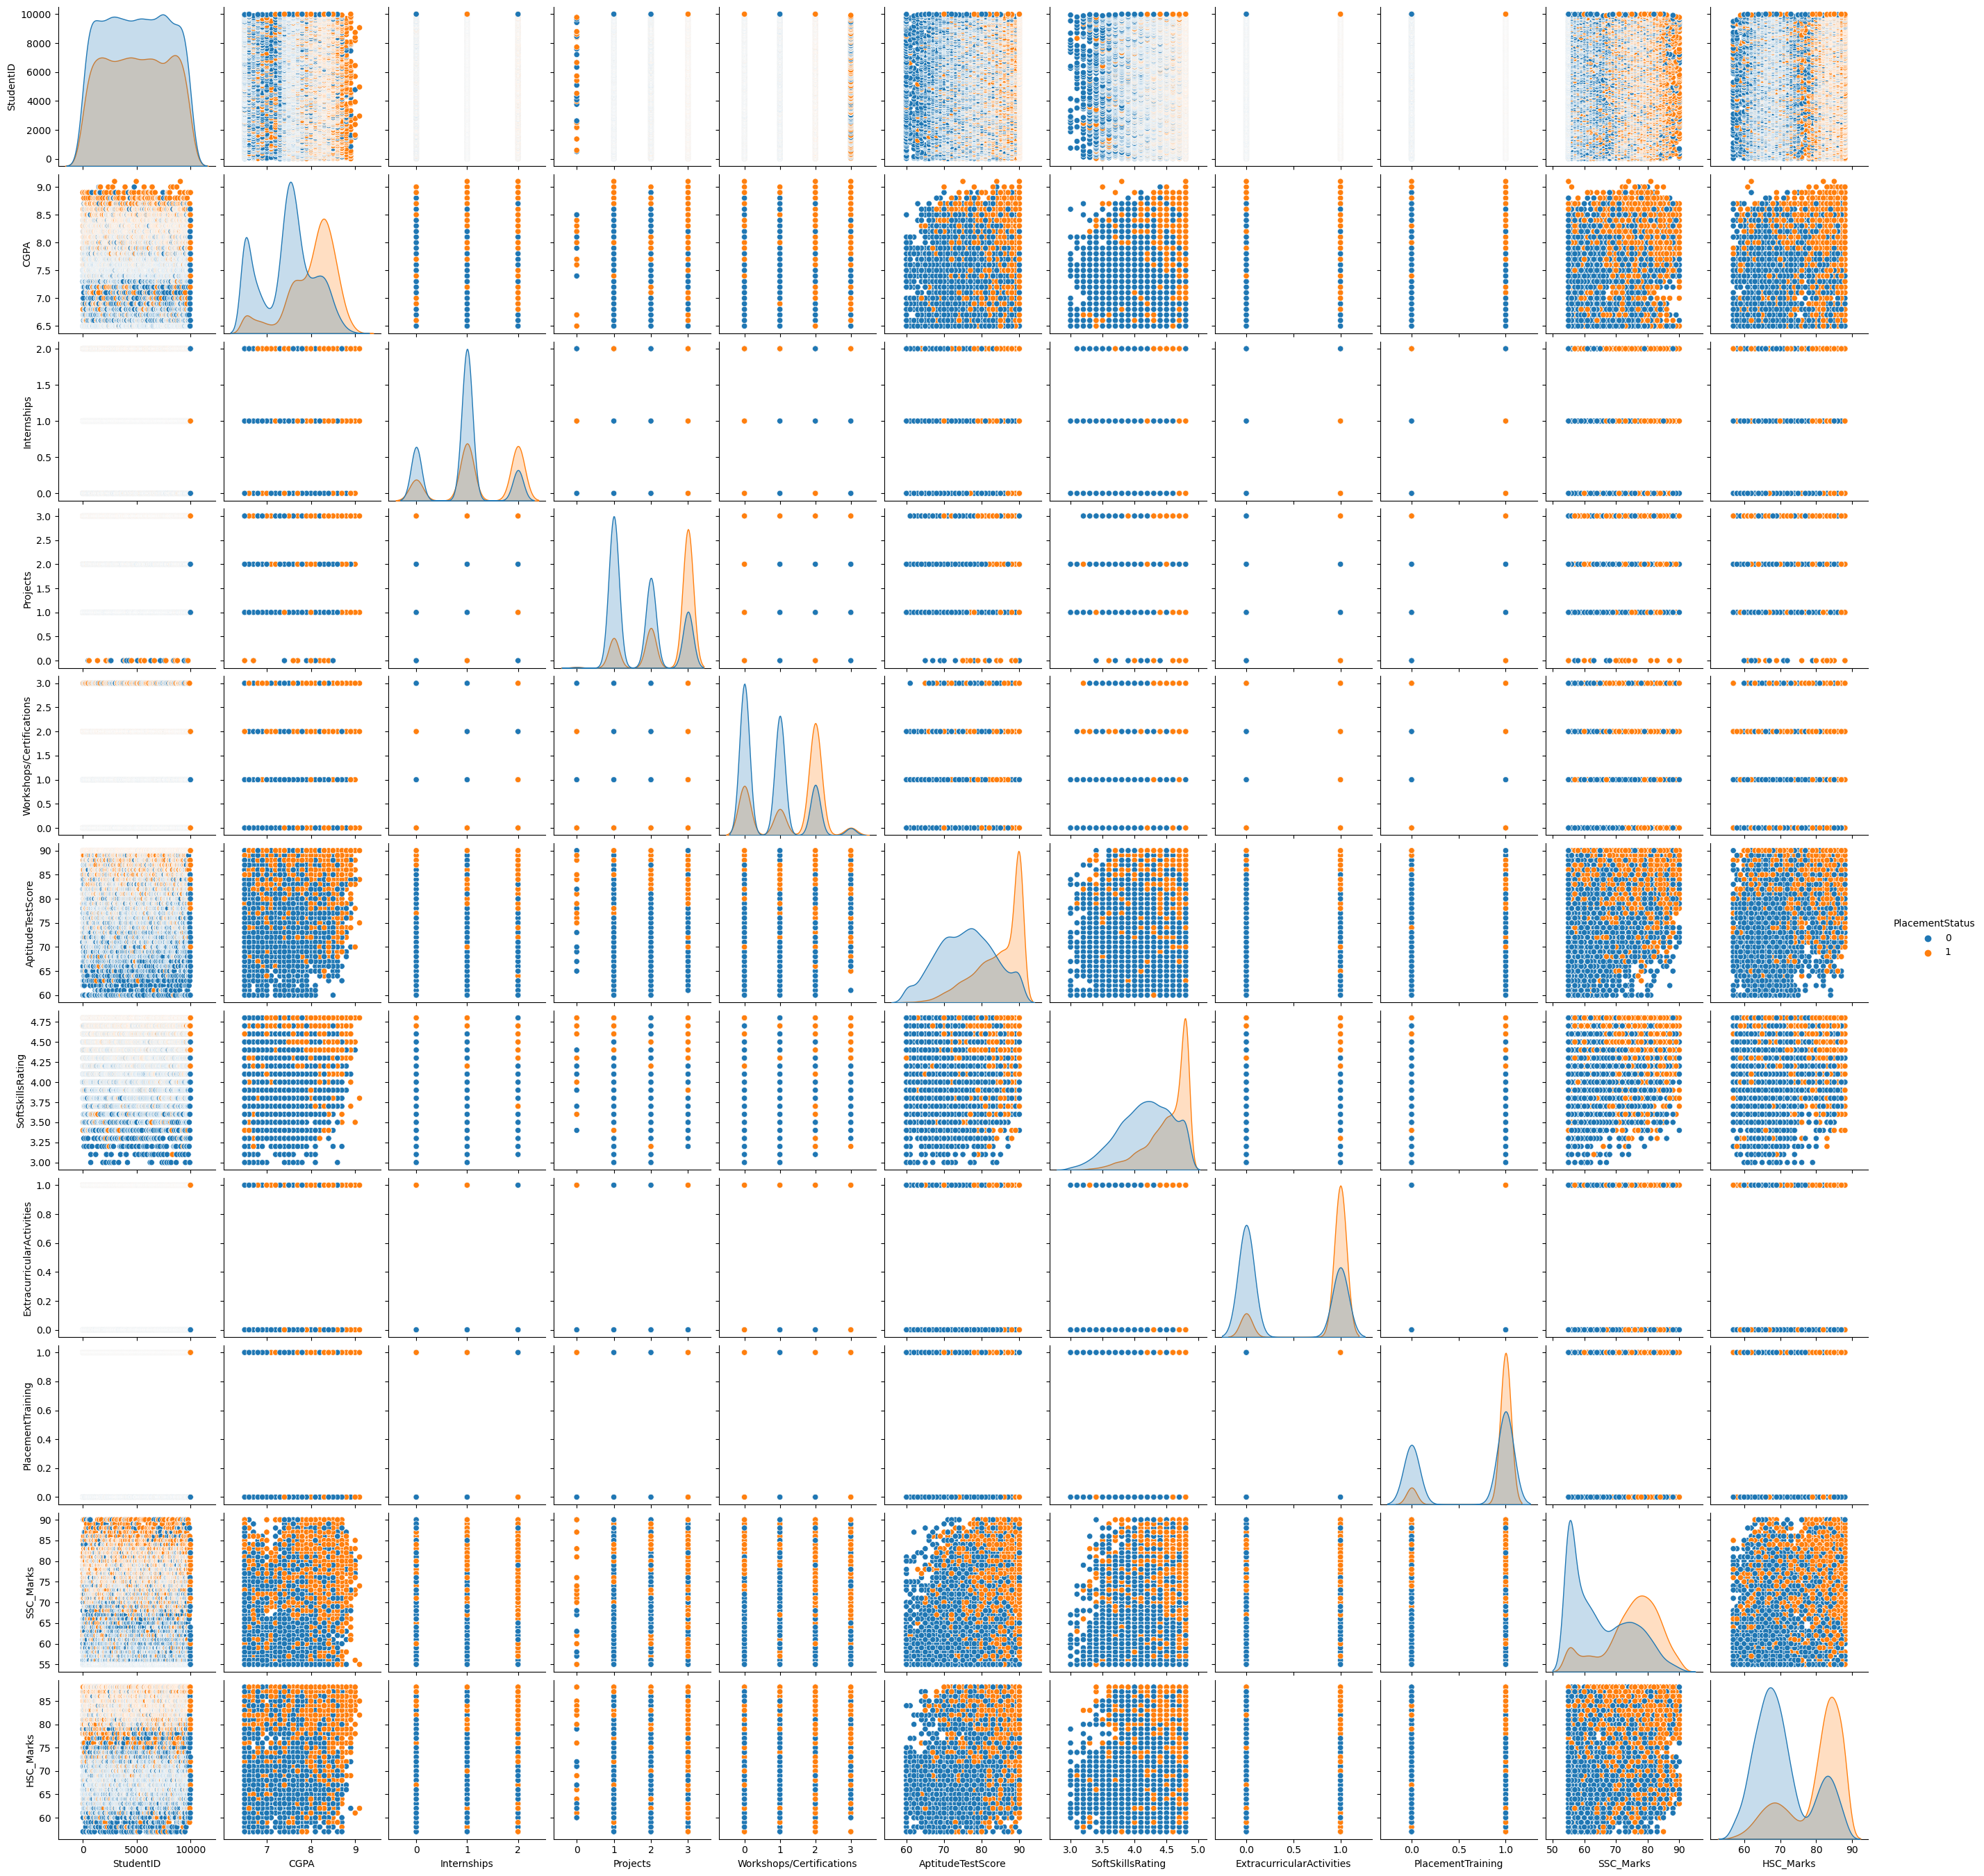

In [62]:
sns.pairplot(df, hue="PlacementStatus", diag_kind="kde")
plt.show()

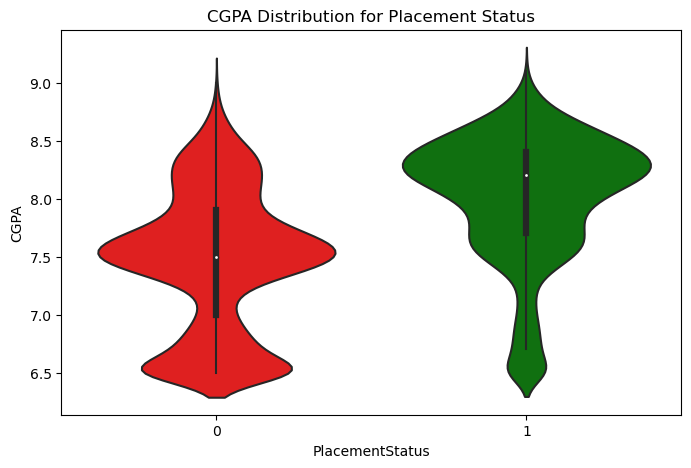

In [63]:
plt.figure(figsize=(8,5))
sns.violinplot(x=df["PlacementStatus"], y=df["CGPA"], palette=["red", "green"])
plt.title("CGPA Distribution for Placement Status")
plt.show()


Students with higher CGPAs are more likely to be placed, with placed students having higher CGPA values.

Broader spread of CGPA values among not placed students, suggesting variability in academic performance.

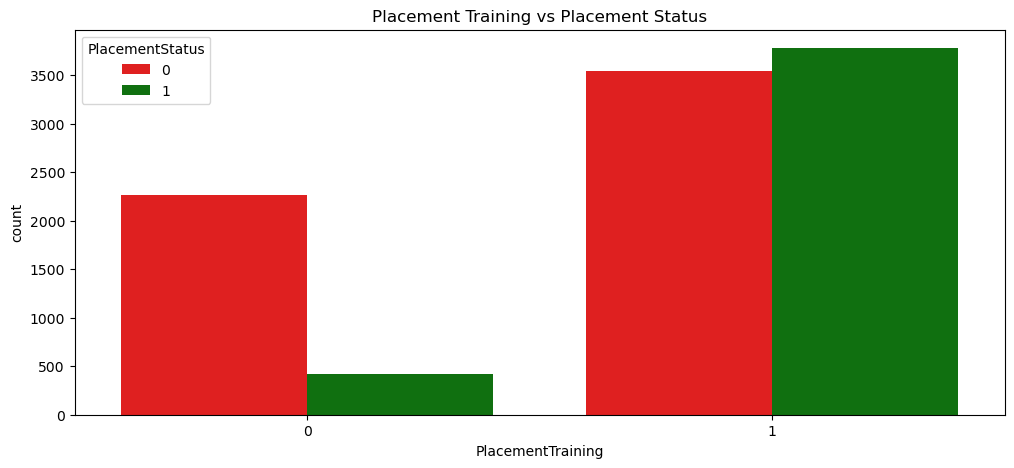

In [66]:
plt.figure(figsize=(12,5))
sns.countplot(x=df["PlacementTraining"].astype(str), hue=df["PlacementStatus"].astype(str), palette=["red", "green"])
plt.title("Placement Training vs Placement Status")
plt.show()


Higher placement rate among students who have undergone placement training, highlighting the effectiveness of such programs.

Significant number of not placed students did not participate in training, indicating a potential area for improvement.

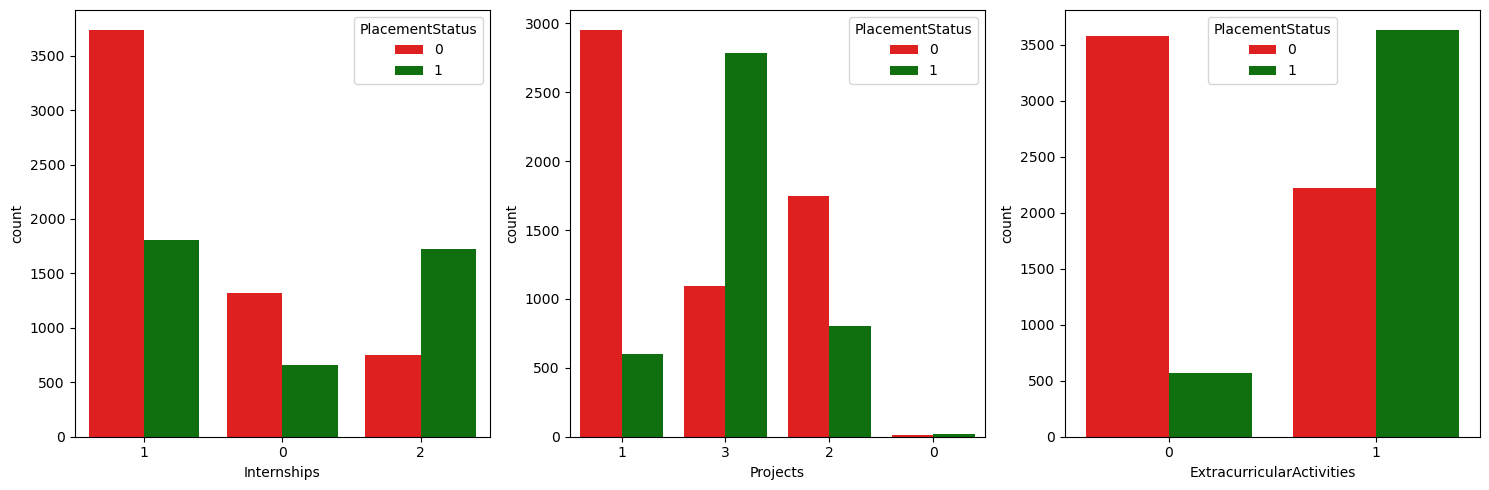

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x=df["Internships"].astype(str), hue=df["PlacementStatus"].astype(str), ax=axes[0], palette=["red", "green"])
sns.countplot(x=df["Projects"].astype(str), hue=df["PlacementStatus"].astype(str), ax=axes[1], palette=["red", "green"])
sns.countplot(x=df["ExtracurricularActivities"].astype(str), hue=df["PlacementStatus"].astype(str), ax=axes[2], palette=["red", "green"])

plt.tight_layout()
plt.show()


Higher likelihood of placement for students participating in internships, projects, and extracurricular activities.

Lower participation in these activities among not placed students, suggesting a need for encouraging more involvement.

Rest Data Preprocessing

In [68]:
# Encode categorical variables
label_encoder = LabelEncoder()
df["PlacementTraining"] = label_encoder.fit_transform(df["PlacementTraining"])
df["ExtracurricularActivities"] = label_encoder.fit_transform(df["ExtracurricularActivities"])
df["PlacementStatus"] = label_encoder.fit_transform(df["PlacementStatus"])  # 1 = Placed, 0 = NotPlaced


In [69]:
# Features & Target
X = df.drop(["StudentID", "PlacementStatus"], axis=1)  # Drop ID column
y = df["PlacementStatus"]



In [70]:
# Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



Model Training

In [71]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [74]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [75]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Results for Logistic Regression:
Accuracy: 0.7936666666666666
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1753
           1       0.75      0.76      0.75      1247

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000

--------------------------------------------------
Results for Random Forest:
Accuracy: 0.7736666666666666
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1753
           1       0.74      0.70      0.72      1247

    accuracy                           0.77      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.77      0.77      0.77      3000

--------------------------------------------------
Results for SVM:
Accuracy: 0.7846666666666666
              precision    recall  f1-score   support

           0       0.81  

In [79]:
#Tuning Logistic Regression
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs"]  # Different solvers
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr = grid_search_lr.best_estimator_
print("Best Logistic Regression:", best_lr)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Logistic Regression: LogisticRegression(C=1, max_iter=500, solver='liblinear')


In [80]:
#Tuning Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest:", best_rf)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest: RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200)


In [81]:
#Tuning SVM
param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
best_svm = grid_search_svm.best_estimator_
print("Best SVM:", best_svm)

Best parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVM: SVC(C=1, gamma='auto')


In [83]:
#stratified kfold cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(C=1, max_iter=500, solver='liblinear'),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200),
    "SVM": SVC(C=1, gamma='auto', probability=True)  # probability=True for AUC calculation
}

for name, model in models.items():
    acc_scores = cross_val_score(model, X, y, cv=kf, scoring="accuracy")
    f1_scores = cross_val_score(model, X, y, cv=kf, scoring="f1")
    auc_scores = cross_val_score(model, X, y, cv=kf, scoring="roc_auc")

    print(f"\n{name} - Cross-Validation Results:")
    print(f"Mean Accuracy: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f"Mean F1-score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")
    print(f"Mean AUC Score: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")



Logistic Regression - Cross-Validation Results:
Mean Accuracy: 0.7975 ± 0.0114
Mean F1-score: 0.7607 ± 0.0125
Mean AUC Score: 0.8767 ± 0.0059

Random Forest - Cross-Validation Results:
Mean Accuracy: 0.7961 ± 0.0066
Mean F1-score: 0.7498 ± 0.0073
Mean AUC Score: 0.8750 ± 0.0057

SVM - Cross-Validation Results:
Mean Accuracy: 0.7844 ± 0.0052
Mean F1-score: 0.7335 ± 0.0078
Mean AUC Score: 0.8404 ± 0.0081


In [86]:
#model evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print(f"\nResults for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {auc_score:.4f}")
    print("-" * 50)


Results for Logistic Regression:
Accuracy: 0.7933333333333333
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1753
           1       0.75      0.76      0.75      1247

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000

ROC AUC Score: 0.8734
--------------------------------------------------

Results for Random Forest:
Accuracy: 0.784
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1753
           1       0.75      0.72      0.73      1247

    accuracy                           0.78      3000
   macro avg       0.78      0.77      0.78      3000
weighted avg       0.78      0.78      0.78      3000

ROC AUC Score: 0.8701
--------------------------------------------------

Results for SVM:
Accuracy: 0.7866666666666666
              precision    recall  f1-score   

In [88]:
#ensemble learning
from sklearn.ensemble import StackingClassifier

stacked_model = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(C=1, solver='liblinear')),
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=10)),
        ('svm', SVC(C=1, gamma='auto', probability=True))
    ],
    final_estimator=LogisticRegression()
)
stacked_model.fit(X_train, y_train)


StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=1, solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=200)),
                               ('svm',
                                SVC(C=1, gamma='auto', probability=True))],
                   final_estimator=LogisticRegression())

In [89]:
y_pred_stacked = stacked_model.predict(X_test)
print("Stacking Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacked))
print(classification_report(y_test, y_pred_stacked))
print("-" * 50)

Stacking Classifier Results:
Accuracy: 0.7866666666666666
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1753
           1       0.75      0.74      0.74      1247

    accuracy                           0.79      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.79      0.79      0.79      3000

--------------------------------------------------


Building a multilayer perceptron model

In [90]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 2)  # 2 classes (Binary Classification)
        self.softmax = nn.Softmax(dim=1)  # Output probabilities

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.softmax(self.fc3(x))
        return x


In [96]:
# Convert dataset to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convert y_train and y_test to NumPy arrays before converting to tensors
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [97]:
# Initialize model
input_size = X_train_tensor.shape[1]
model = MLP(input_size)

In [98]:
criterion = nn.CrossEntropyLoss()  # Suitable for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


In [99]:
# Training loop
epochs = 50
batch_size = 32

for epoch in range(epochs):
    optimizer.zero_grad()  # Zero gradients
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if (epoch + 1) % 10 == 0:  # Print every 10 epochs
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/50], Loss: 0.6759
Epoch [20/50], Loss: 0.6454
Epoch [30/50], Loss: 0.6014
Epoch [40/50], Loss: 0.5609
Epoch [50/50], Loss: 0.5362


In [100]:
# Model evaluation
with torch.no_grad():
    y_pred_logits = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_logits, axis=1)

accuracy = (y_pred == y_test_tensor).float().mean().item()
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7800


In [101]:
# Confusion Matrix
with torch.no_grad():
    y_pred_logits = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_logits, axis=1)
    cm = confusion_matrix(y_test_tensor, y_pred)
    print("Confusion Matrix:")
    print(cm)

Confusion Matrix:
[[1394  359]
 [ 308  939]]


In [102]:
# Save as CSV files
pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False)
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)

print("Datasets saved as CSV files!")

Datasets saved as CSV files!


Saving all the models

In [108]:
# Dictionary to store the trained models
models = {
    "logistic_regression": best_lr,
    "svc": best_svm,
    "random_forest": best_rf,
    "stacking_classifier": stacked_model
}

# Save models to a file
with open("trained_models.pkl", "wb") as f:
    pickle.dump(models, f)

print("Models saved successfully!")

Models saved successfully!
